In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
for i in data.columns:
    if data[i].dtype == object:
        print(str(i) + ' : '+ str(data[i].unique()))
        print('__________________________________________________________________________________')

Attrition : ['Yes' 'No']
__________________________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
__________________________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
__________________________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
__________________________________________________________________________________
Gender : ['Female' 'Male']
__________________________________________________________________________________
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
__________________________________________________________________________________
MaritalStatu

In [6]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [7]:
# Over18 feature has only 1 entry which is Y so we can drop this feature
data=data.drop('Over18', axis=1)

# EmployeeCount feature has only 1 entry which is 1 so we can drop this feature
data=data.drop('EmployeeCount', axis=1)

#EmployeeNumber feature is not significant and is not going to impact our label so we can drop 
data=data.drop('EmployeeNumber', axis=1)

In [8]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [9]:
#Since StandardHours feature has only one entry as 80 so we can drop that column.

data=data.drop('StandardHours', axis=1)

In [10]:
data.shape

(1470, 31)

In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
#Checking and removing if there is any Duplicate entry present in our dataset
data.drop_duplicates(inplace=True)
data.shape

(1470, 31)

No Duplicate record(s) found

In [13]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=data.columns.values.tolist()

for col in features:
    if data[col].dtypes in numerics:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [14]:
# Checking for Multicollinearity using VIF

w = data[list(data.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info['Column'] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
21,124.654850,PerformanceRating
12,52.588213,JobLevel
20,42.499948,PercentSalaryHike
0,33.357814,Age
16,32.085296,MonthlyIncome
26,15.604104,WorkLifeBalance
11,15.236815,JobInvolvement
24,14.641943,TotalWorkingYears
4,13.044796,Department
10,11.246412,HourlyRate


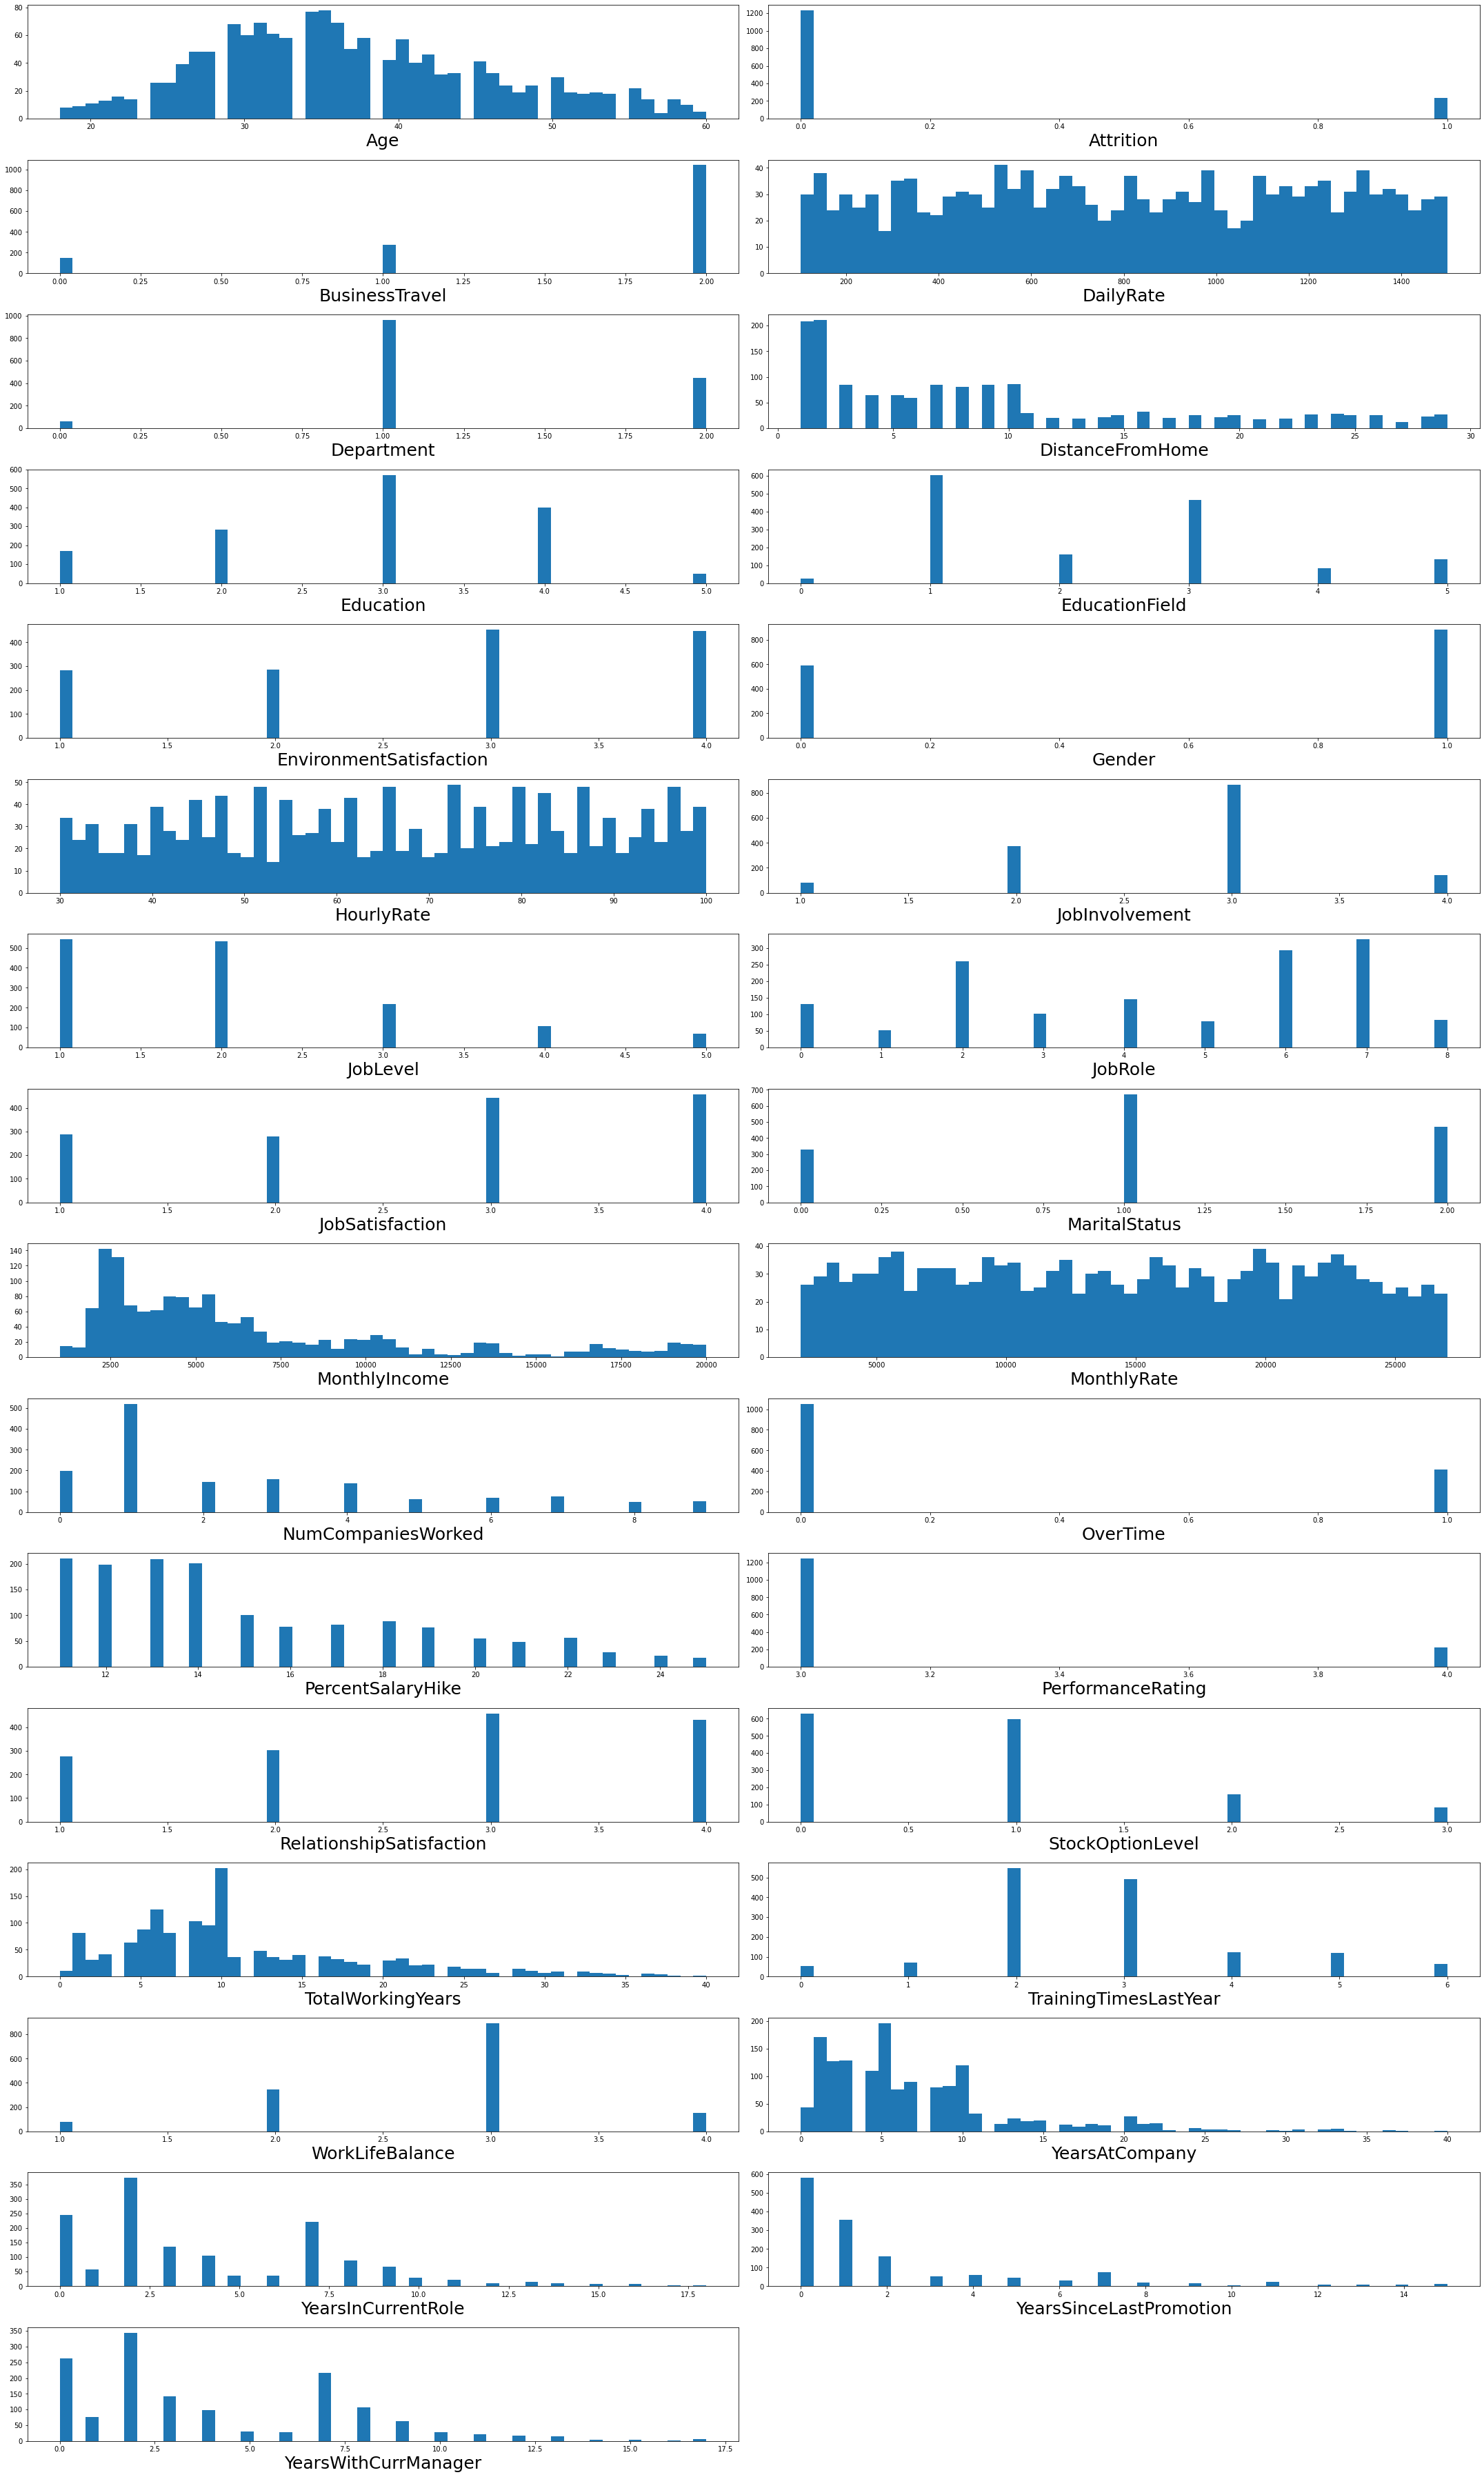

In [15]:
plt.figure(figsize=[30,50])
plotnumber=1

for column in data:
    if plotnumber<=32:
        ax=plt.subplot(16,2,plotnumber)
        plt.hist(data[column], bins=50)
        plt.xlabel(column, fontsize=25)
    plotnumber+=1
plt.tight_layout()

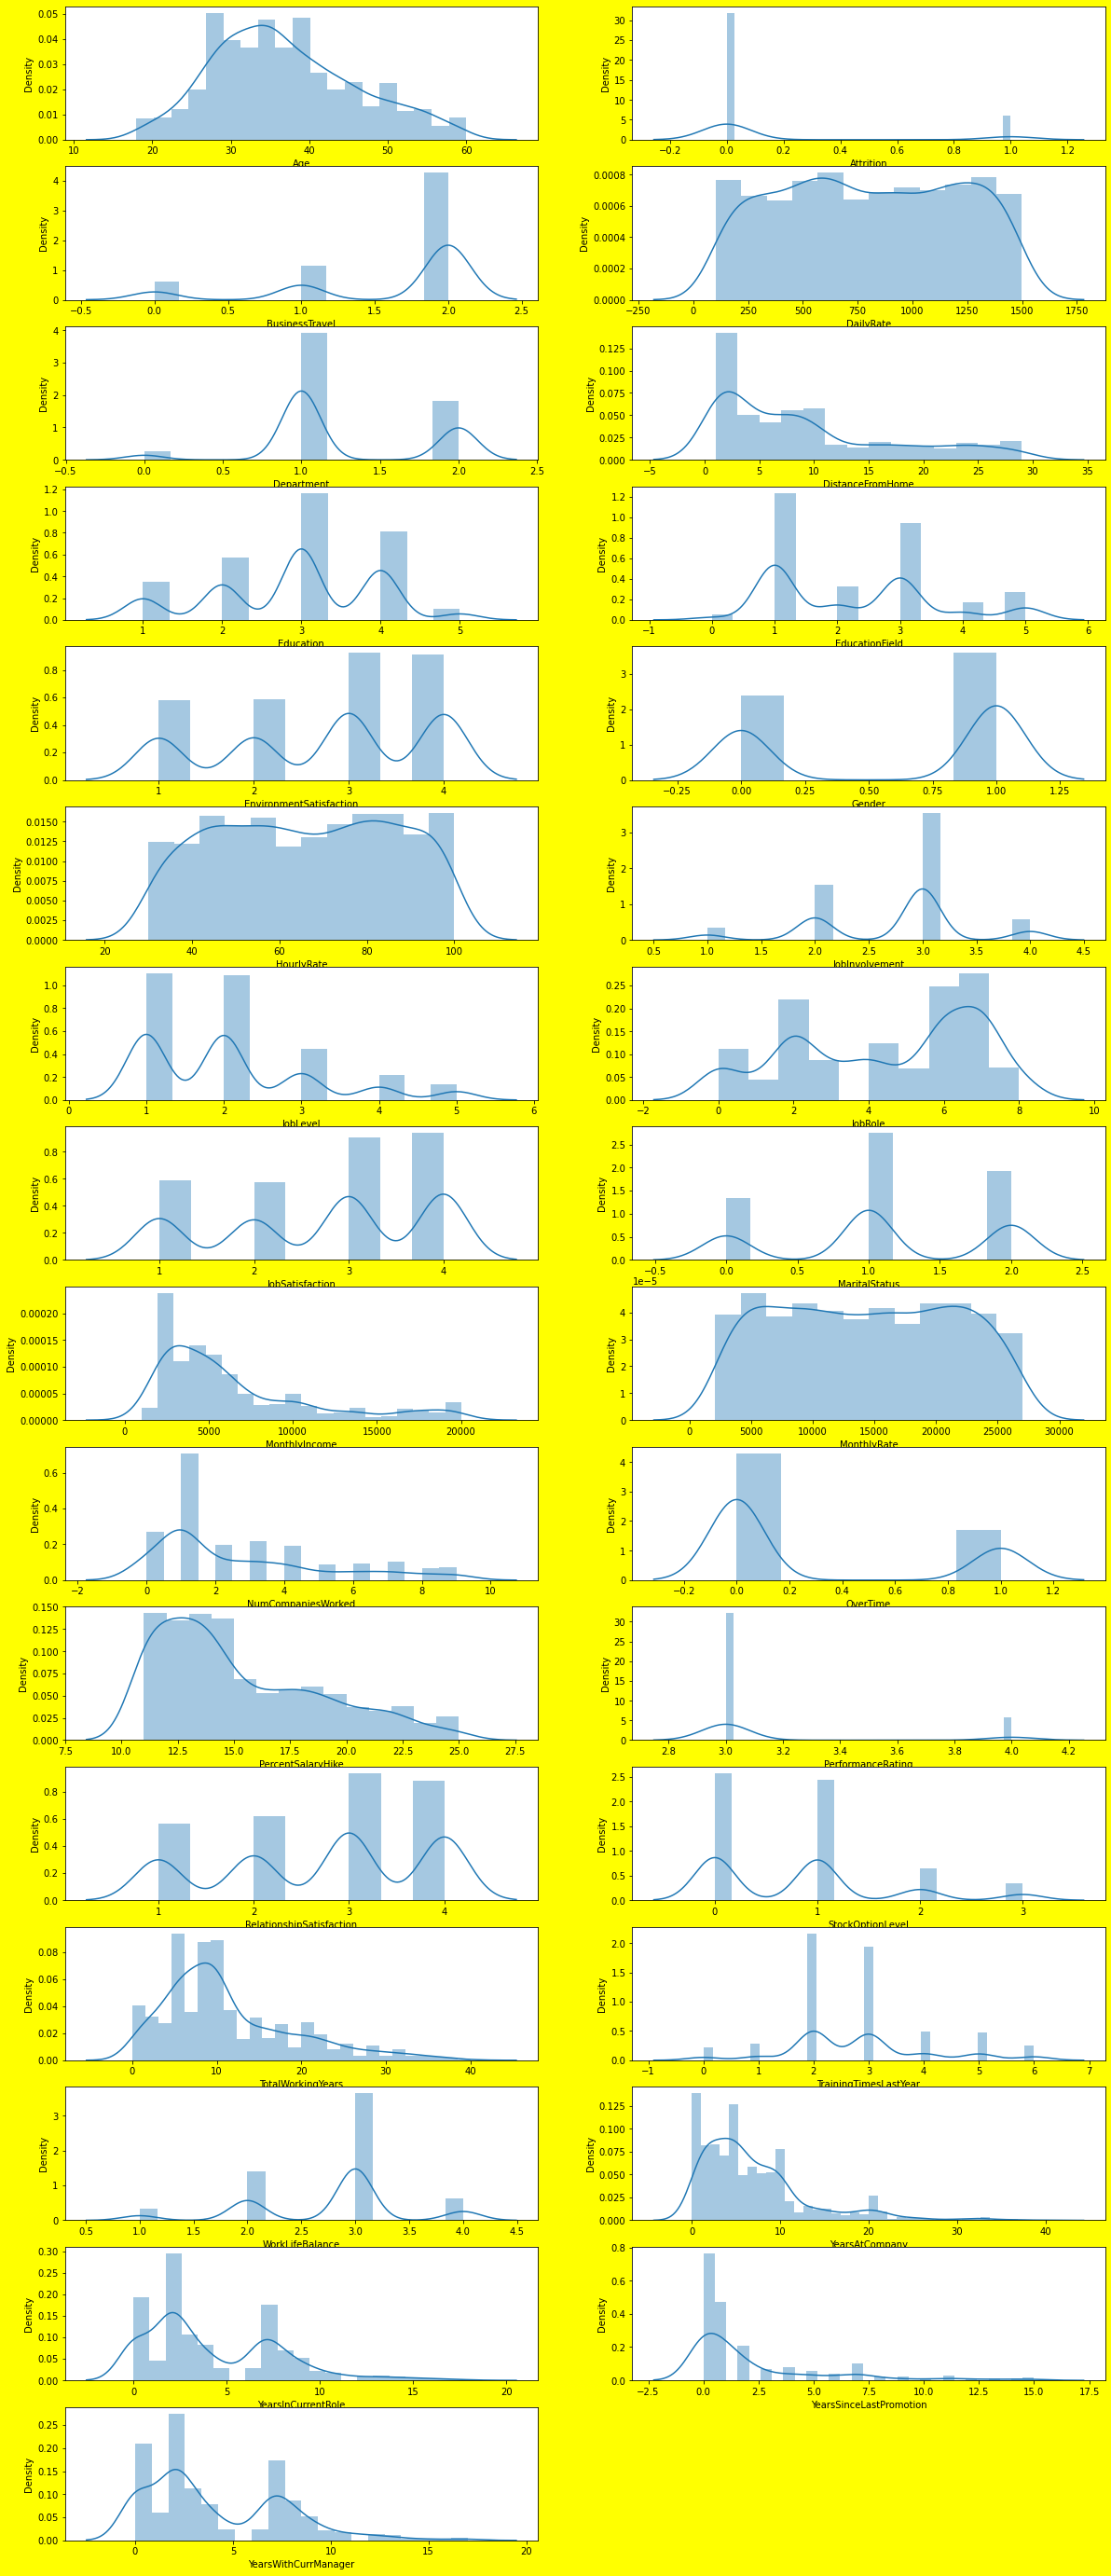

In [16]:
plt.figure(figsize=(20,50),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=32:
        ax=plt.subplot(16,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see some skewness in some features so let's plot a box plot and see

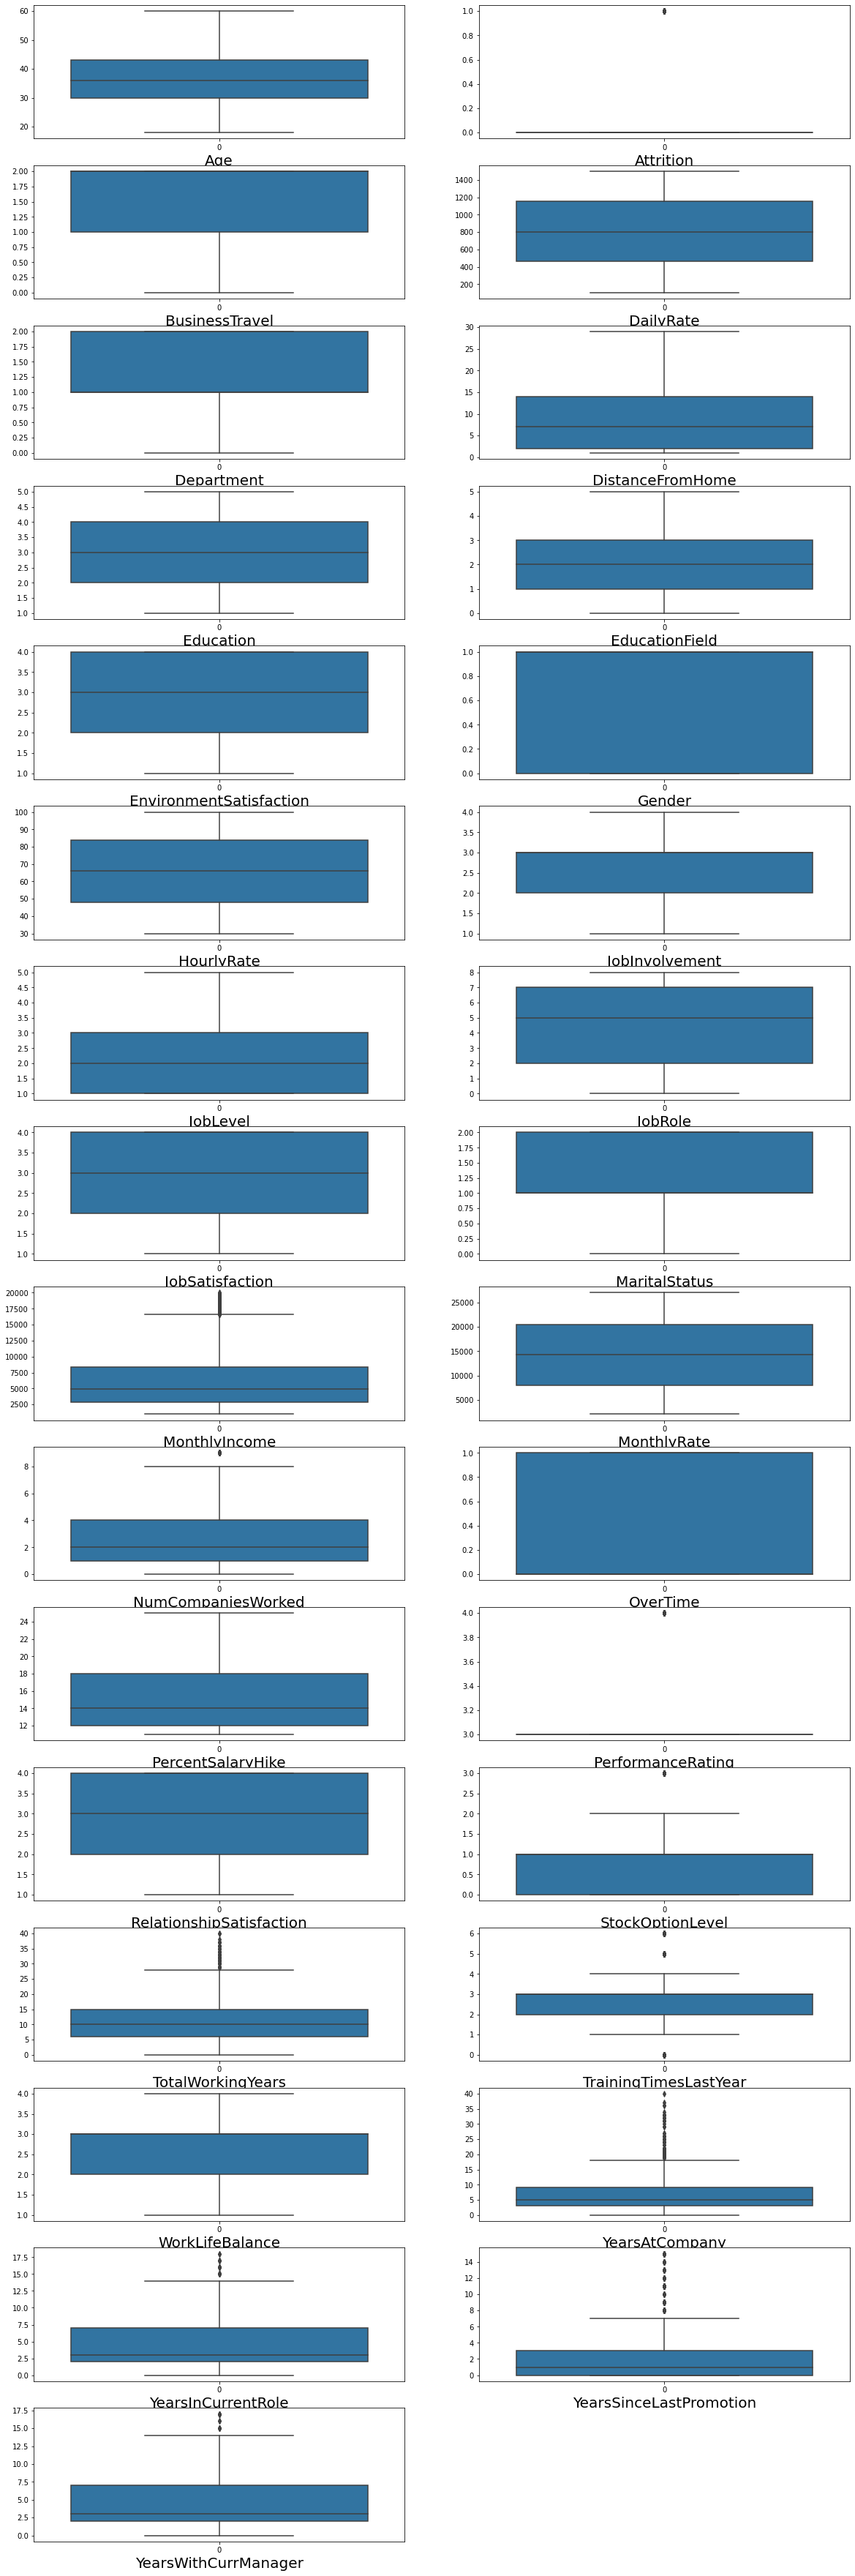

In [17]:
plt.figure(figsize=(20,100))
graph=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(25,2,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

From Above Figures, it is clear that there are outliers present in features like MonthlyIncome, NumCompaniesWorked, 
TotalWorkingYears, YearsAtCompany, etc

However, outliers are present but since these are important features so they have high impact on label so we are not going to remove it.

Let's Check the corelations between Features

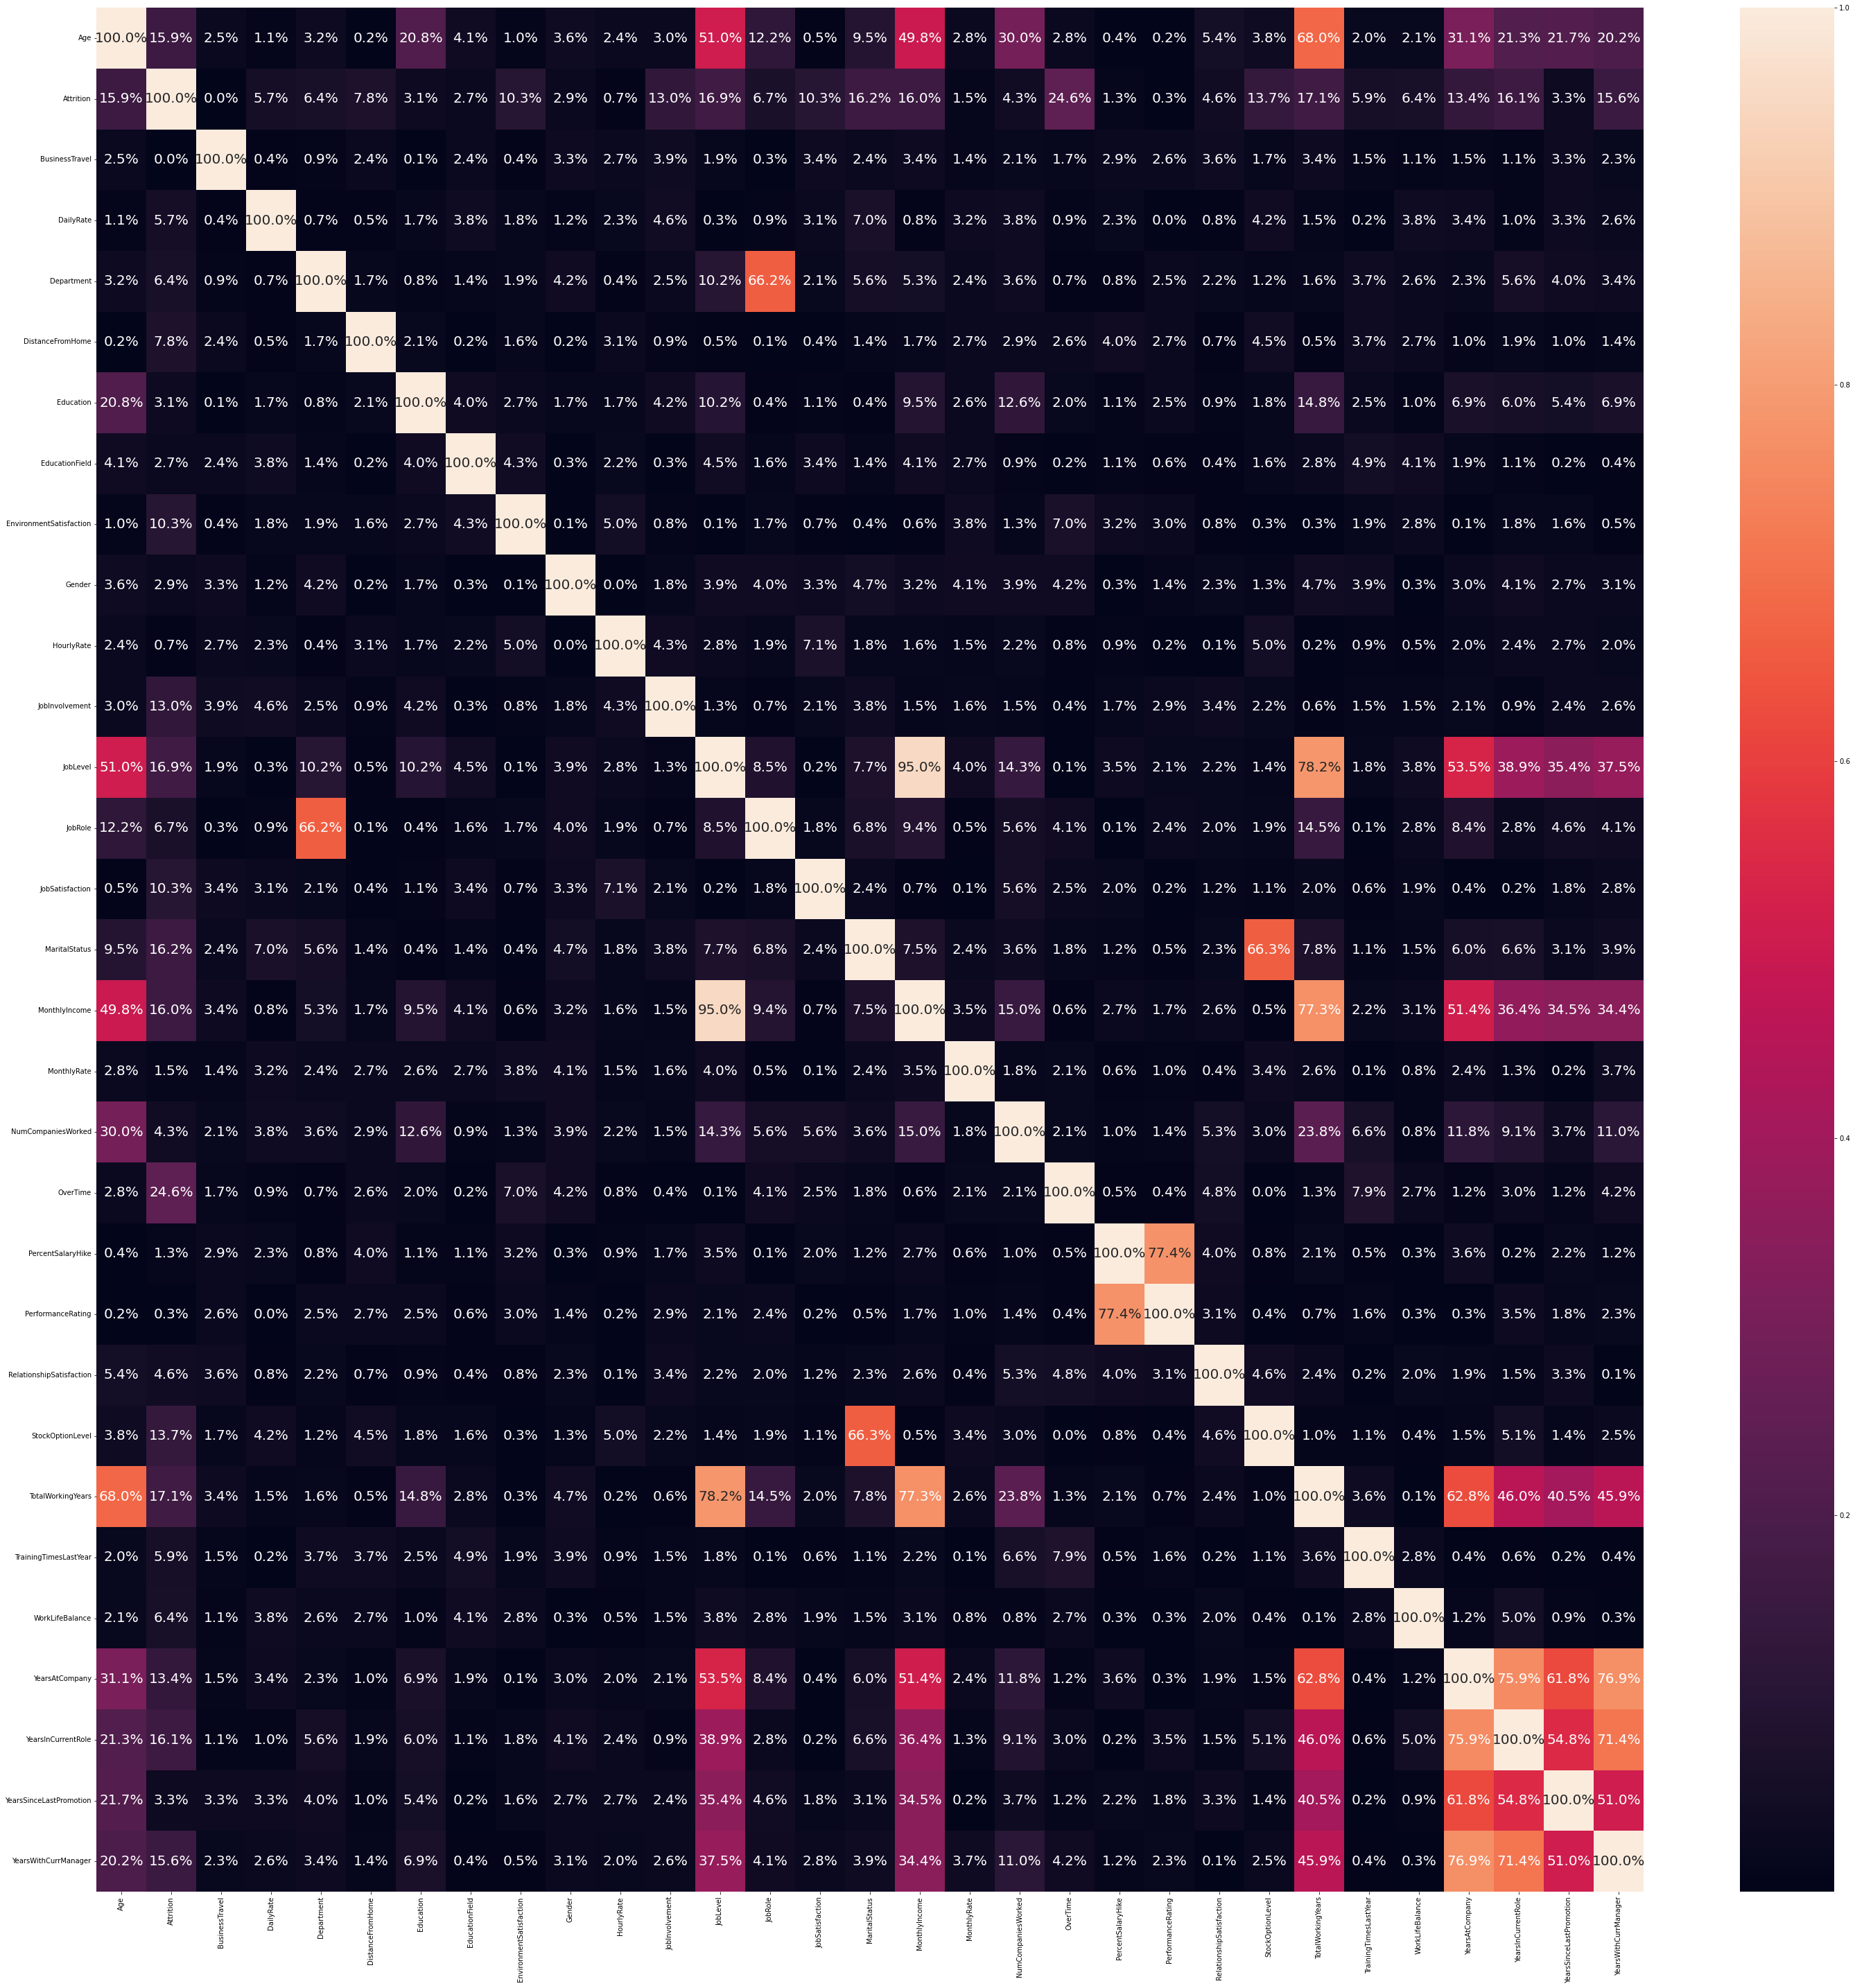

In [18]:
df_corr=data.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20}, fmt='.1%')
plt.show()

Heatmap shows the correlation between Features like Age feature has 62.3% correlation with TotalWorkingYears features and many more

In [19]:
#Checking if our balanced or not

data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

This clearly shows our data is imbalanced, we need to balance our data using SMOTE

Let's balance our data now

In [20]:
# Let us know split our data into Features & labels

x=data.drop('Attrition', axis=1)
y=data['Attrition']

In [21]:
# Now let's split our data into Train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=44)

In [22]:
y_train.value_counts()

0    921
1    181
Name: Attrition, dtype: int64

In [23]:
sm=SMOTE()

In [24]:
ove_smp=SMOTE(0.75)

x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)



In [25]:
y_train_ns.value_counts()

0    921
1    690
Name: Attrition, dtype: int64

Now our data seems to be balanced

# All our preprocessing is over now and our data is ready for model building

In [26]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [28]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [29]:
#Training of Models starts here

lr.fit(x_train_ns,y_train_ns)
knn.fit(x_train_ns,y_train_ns)
dt.fit(x_train_ns,y_train_ns)
rf.fit(x_train_ns,y_train_ns)

print('Training completed')

Training completed


In [30]:
#Let's check the scores now

print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.717391304347826
0.6793478260869565
0.7010869565217391
0.8396739130434783


Above scores clearly says, the best model is RandomForest

Let's see how well our model works on training data

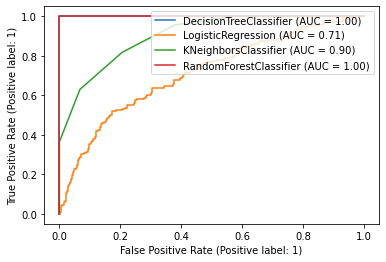

In [31]:
#Confusion Matrix

show=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=show.ax_)
plot_roc_curve(knn,x_train,y_train,ax=show.ax_)
plot_roc_curve(rf,x_train,y_train,ax=show.ax_)
plt.legend(prop={'size':10}, loc='upper right')
plt.show()

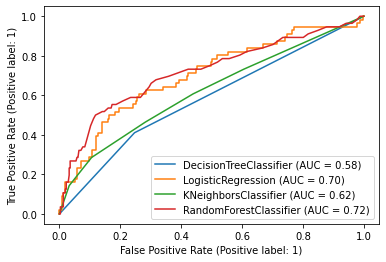

In [32]:
show=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=show.ax_)
plot_roc_curve(knn,x_test,y_test,ax=show.ax_)
plot_roc_curve(rf,x_test,y_test,ax=show.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [33]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [34]:
print('Logistic Regression:',accuracy_score(y_test,lr_pred))
print('KNN :',accuracy_score(y_test,knn_pred))
print('Decision Tree :', accuracy_score(y_test,dt_pred))
print('Random Forest :',accuracy_score(y_test,rf_pred))

Logistic Regression: 0.717391304347826
KNN : 0.6793478260869565
Decision Tree : 0.7010869565217391
Random Forest : 0.8396739130434783


From all the above observations and scores, it is clear that RandomForest model is working the best so we will move ahead with RandomForest.

Let's do Hyperparameter tuning using GridSearchCV

In [35]:
#Let's do some Hyperparameter tuning using GridSearchCV algorithm
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,20),
    'min_samples_leaf':range(2,15),
    'min_samples_split': range(2,10),
    'max_leaf_nodes':range(2,5)
}

In [36]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [37]:
grid_search.fit(x_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 10)})

In [38]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [39]:
dec_tree=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=4,min_samples_split=2,max_depth=10,min_samples_leaf=2)
r_f=RandomForestClassifier(criterion='gini',max_leaf_nodes=3,min_samples_split=2,max_depth=10,min_samples_leaf=2)

In [40]:
dec_tree.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=4, min_samples_leaf=2)

In [41]:
r_f.fit(x_train_ns,y_train_ns)

RandomForestClassifier(max_depth=10, max_leaf_nodes=3, min_samples_leaf=2)

In [42]:
y1_pred=dec_tree.predict(x_test)
y2_pred=r_f.predict(x_test)

In [43]:
accuracy_score(y_test,y1_pred)

0.7554347826086957

In [44]:
accuracy_score(y_test,y2_pred)

0.8260869565217391

The best accuracy is given by Random Forest Model

In [45]:
filename='hrIBM.pickle'
pickle.dump(rf,open(filename,'wb'))